In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('1_Reults.20887.interaction_terms_go_family_topfam.tsv', sep='\t')
X = df.iloc[:, 1:-2]
y = df['protein_family'].values

# Define class names explicitly
class_names = [
    "Short-chain dehydrogenases/reductases (SDR) family",
    "Glycosyl hydrolase 5 (cellulase A) family",
    "Bacterial solute-binding protein 2 family",
    "Cytochrome P450 family",
    "FPP/GGPP synthase family",
    "Enoyl-CoA hydratase/isomerase family",
    "Class-I aminoacyl-tRNA synthetase family",
    "Peptidase S1 family"
]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Verify class names in dataset
unique_classes = np.unique(y)
if not all(cls in class_names for cls in unique_classes):
    print("Warning: Unexpected class labels found in dataset!")

# Binarize the output
y = label_binarize(y, classes=class_names)
n_classes = y.shape[1]

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train the model
classifier = OneVsRestClassifier(HistGradientBoostingClassifier())

classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)  # FIX: Use predict_proba instead of decision_function

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define specific colors for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
colors = colors[:n_classes]  # Adjust in case of fewer classes

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0), borderaxespad=0.)  # FIX: Ensure full legend visibility
plt.savefig("ROC_curve.pdf", bbox_inches="tight")  # FIX: Prevent legend cutoff
plt.show()


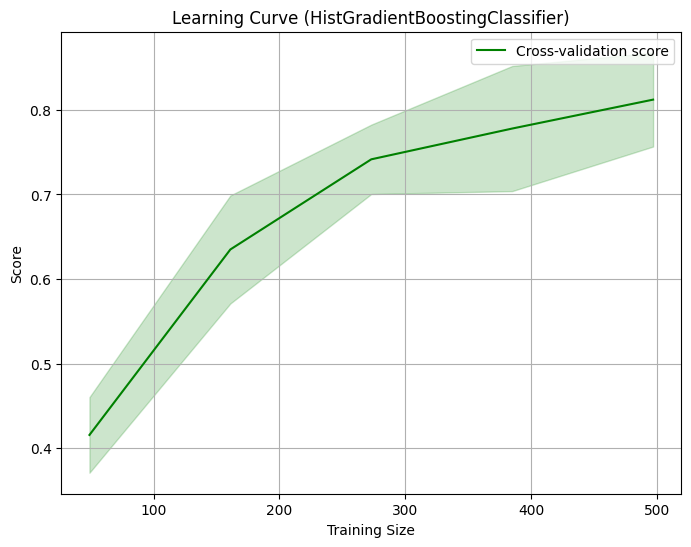

In [3]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load dataset
df = pd.read_csv('1_Reults.20887.interaction_terms_go_family_topfam.tsv', sep='\t')

X = df.iloc[:, 1:-2]
y = df['protein_family']

# Define class names explicitly
class_names = [
    "Short-chain dehydrogenases/reductases (SDR) family",
    "Glycosyl hydrolase 5 (cellulase A) family",
    "Bacterial solute-binding protein 2 family",
    "Cytochrome P450 family",
    "FPP/GGPP synthase family",
    "Enoyl-CoA hydratase/isomerase family",
    "Class-I aminoacyl-tRNA synthetase family",
    "Peptidase S1 family"
]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Binarize the output
y = label_binarize(y, classes=class_names)
n_classes = y.shape[1]

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0,shuffle=True)

# Initialize the classifier
clf = OneVsRestClassifier(HistGradientBoostingClassifier(max_iter=1000))

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=10, n_jobs=-1)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
#plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')

# Plot the standard deviation as shaded areas
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve (HistGradientBoostingClassifier)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("Learning-Curve.pdf")
plt.show()
